## **Import Data**

In [1]:
# Import Library

import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud, STOPWORDS

In [2]:
#import "data.csv" to df
df_data = pd.read_csv("data.csv", encoding='latin-1') 

In [3]:
#check table size
df_data.shape

(13169, 13)

In [4]:
#see information of the data type
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


In [5]:
df_data.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [6]:
df_data[['Tweet']].head(15)

,Tweet
0,- disaat semua cowok berusaha melacak perhatia...
1,RT USER: USER siapa yang telat ngasih tau elu?...
2,"41. Kadang aku berfikir, kenapa aku tetap perc..."
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...
4,USER USER Kaum cebong kapir udah keliatan dong...
5,USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...
6,deklarasi pilkada 2018 aman dan anti hoax warg...
7,Gue baru aja kelar re-watch Aldnoah Zero!!! pa...
8,Nah admin belanja satu lagi port terbaik nak m...
9,USER Enak lg klo smbil ngewe'


In [7]:
#display column within df
df_data.columns

Index(['Tweet', 'HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion',
       'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak',
       'HS_Moderate', 'HS_Strong'],
      dtype='object')

In [8]:
#display null value from df
df_data.isna().sum()

Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
dtype: int64

In [9]:
#display duplicated data from df
df_data.duplicated().sum()

125

In [10]:
#remove the duplucated data
df_data = df_data.drop_duplicates()
df_data.duplicated().sum()

0

## **Import Kamus Alay**

In [11]:
#import "new_kamusalay.csv" to df
df_alay = pd.read_csv("new_kamusalay.csv", encoding='latin-1') 

In [12]:
print("Shape: ", df_alay.shape)
df_alay.head(15)

Shape:  (15166, 1)


,anakjakartaasikasik;anak jakarta asyik asyik
0,pakcikdahtua;pak cik sudah tua
1,pakcikmudalagi;pak cik muda lagi
2,t3tapjokowi;tetap jokowi
3,3x;tiga kali
4,aamiin;amin
5,aamiinn;amin
6,aamin;amin
7,aammiin;amin
8,abis;habis
9,abisin;habiskan


## **Import Abusive Words**

In [13]:
#import "abusive.csv" to df
df_abusive = pd.read_csv("abusive.csv", encoding='latin-1') 

In [14]:
df_abusive.head(15)

,ABUSIVE
0,alay
1,ampas
2,buta
3,keparat
4,anjing
5,anjir
6,babi
7,bacot
8,bajingan
9,banci


In [15]:
df_abusive['Label'] = 'Abusive'
df_abusive

,ABUSIVE,Label
0,alay,Abusive
1,ampas,Abusive
2,buta,Abusive
3,keparat,Abusive
4,anjing,Abusive
...,...,...
120,rezim,Abusive
121,sange,Abusive
122,serbet,Abusive
123,sipit,Abusive


In [16]:
dictionary = dict(zip(df_abusive['ABUSIVE'], df_abusive['Label']))
df_abusive['Label'] = df_data['Tweet'].apply(lambda x: next((dictionary.get(w, 'Non Abusive') for w in re.findall(r'\b%s\b' % '|'.join(dictionary.keys()), x)), 'Non Abusive'))

## 2. **Cleansing Data**

In [17]:
df_data['Tweet'] = df_data['Tweet'].apply(lambda x: re.sub(r'\\', '', x) if isinstance(x, str) else x)
df_data['Tweet'] = df_data['Tweet'].apply(lambda x: re.sub(r'x\d+', '', x) if isinstance(x, str) else x)
df_data
df_data.to_csv('cleaned_data_analysis.csv', index=False, encoding='utf-8')

In [18]:
#cleansing Tweet from 'Tweet' column
def cleansing(text):
    #make sentence being lowercase
    text = text.lower()
    
    #remove non-alphabetic characters (excluding spaces) from string values in the Dataframe
    text = re.sub('[^a-zA-Z\s]', '', text)
        
    #remove words with three or fewer characters from string values in the Dataframe
    text = re.sub(r'\b\w{1,3}\b', '', text)
    
    #remove words with 15 or more characters from string values in the Dataframe
    text = re.sub(r'\b\w{15,}\b', '', text)
    
    #remove trailing and leading whitespace in string values of the Dataframe
    text = text.strip()
    
    #remove the whitespace in string values of the Dataframe
    text = re.sub(r'\s+', ' ', text)
    
    #remove emoji from string values in the Dataframe
    text = re.sub(r'[\\x]+[a-z0-9]{2}', '', text)
    
    #remove hashtag from string values in the Dataframe
    text = re.sub(r'#([^\s]+)', '', text)
    
    #replace user mentions (e.g., @username) with an empty string
    text = re.sub(r'@\w+', '', text)

    #remove hashtag
    text = re.sub(r'#([^\s]+)', '', text)

    #remove punctuation
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    #remove single character
    text = re.sub(r'\b\w{1,3}\b', '', text)

    #remove digit character
    text = re.sub(r'\d+', '', text)

    #remove URL
    text = re.sub(r'http\S+', '', text) 
    
    #remove multiple whitespace
    text = re.sub(r'(\s+|\\n)', ' ', text)

    #remove "wkwkwk"
    text = re.sub(r'\bwk\w+', '', text)
    
    #remove whitespace at the first and end sentences
    text = text.rstrip()
    text = text.lstrip()
    
    #remove word user
    text = text.replace('user', '')
    
    return text

df_data['Tweet'] = df_data['Tweet'].apply(cleansing)

#replace alay words
def alay_word (text):
    words = text.split()
    correction_text = []
    for word in words:
        if word in df_alay:
            correction_text.append(kamus[word])
        else:
            correction_text.append(word)
    return ' '.join(correction_text)

df_data['Tweet'] = df_data['Tweet'].apply(alay_word)

#remove abusive word
abusive_patterns = df_abusive['ABUSIVE'].tolist()

abusive_word_counts = []
for text in df_data['Tweet']:
    count = sum(1 for word in abusive_patterns if re.search(fr'\b{re.escape(word)}\b', text, flags=re.IGNORECASE))
    abusive_word_counts.append(count)
    
df_data['abusive_word_count'] = abusive_word_counts

df_data

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,abusive_word_count
0,disaat semua cowok berusaha melacak perhatian ...,1,1,1,0,0,0,0,0,1,1,0,0,1
1,siapa yang telat ngasih eluedan sarap bergaul ...,0,1,0,0,0,0,0,0,0,0,0,0,1
2,kadang berfikir kenapa tetap percaya pada tuha...,0,0,0,0,0,0,0,0,0,0,0,0,0
3,akunnku matamu sipit tapi diliat dari mana,0,0,0,0,0,0,0,0,0,0,0,0,1
4,kaum cebong kapir udah keliatan dongoknya dari...,1,1,0,1,1,0,0,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,jangan asal ngomong ndasmu congor sekate anjyng,1,1,1,0,0,0,1,0,0,1,0,0,1
13165,kasur mana enak kunyuk,0,1,0,0,0,0,0,0,0,0,0,0,1
13166,hati hati bisu gnnlagi bosan huft,0,0,0,0,0,0,0,0,0,0,0,0,1
13167,yang real mudah terdeteksi yang terkubur suatu...,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
df_data['total_char'] = df_data.Tweet.apply(len)
df_data['word'] = df_data.Tweet.apply(lambda x: x.split())
df_data['total_word'] = df_data.Tweet.apply(lambda sent: len(sent.split()))

df_data.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,abusive_word_count,total_char,word,total_word
0,disaat semua cowok berusaha melacak perhatian ...,1,1,1,0,0,0,0,0,1,1,0,0,1,101,"[disaat, semua, cowok, berusaha, melacak, perh...",14
1,siapa yang telat ngasih eluedan sarap bergaul ...,0,1,0,0,0,0,0,0,0,0,0,0,1,92,"[siapa, yang, telat, ngasih, eluedan, sarap, b...",15
2,kadang berfikir kenapa tetap percaya pada tuha...,0,0,0,0,0,0,0,0,0,0,0,0,0,212,"[kadang, berfikir, kenapa, tetap, percaya, pad...",28
3,akunnku matamu sipit tapi diliat dari mana,0,0,0,0,0,0,0,0,0,0,0,0,1,42,"[akunnku, matamu, sipit, tapi, diliat, dari, m...",7
4,kaum cebong kapir udah keliatan dongoknya dari...,1,1,0,1,1,0,0,0,0,0,1,0,2,78,"[kaum, cebong, kapir, udah, keliatan, dongokny...",12


In [20]:
from nltk.tokenize import word_tokenize

def word_tokenize_wrapper(text):
    return word_tokenize(text)

df_data['text_token'] = df_data['Tweet'].apply(word_tokenize_wrapper)
df_data.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,abusive_word_count,total_char,word,total_word,text_token
0,disaat semua cowok berusaha melacak perhatian ...,1,1,1,0,0,0,0,0,1,1,0,0,1,101,"[disaat, semua, cowok, berusaha, melacak, perh...",14,"[disaat, semua, cowok, berusaha, melacak, perh..."
1,siapa yang telat ngasih eluedan sarap bergaul ...,0,1,0,0,0,0,0,0,0,0,0,0,1,92,"[siapa, yang, telat, ngasih, eluedan, sarap, b...",15,"[siapa, yang, telat, ngasih, eluedan, sarap, b..."
2,kadang berfikir kenapa tetap percaya pada tuha...,0,0,0,0,0,0,0,0,0,0,0,0,0,212,"[kadang, berfikir, kenapa, tetap, percaya, pad...",28,"[kadang, berfikir, kenapa, tetap, percaya, pad..."
3,akunnku matamu sipit tapi diliat dari mana,0,0,0,0,0,0,0,0,0,0,0,0,1,42,"[akunnku, matamu, sipit, tapi, diliat, dari, m...",7,"[akunnku, matamu, sipit, tapi, diliat, dari, m..."
4,kaum cebong kapir udah keliatan dongoknya dari...,1,1,0,1,1,0,0,0,0,0,1,0,2,78,"[kaum, cebong, kapir, udah, keliatan, dongokny...",12,"[kaum, cebong, kapir, udah, keliatan, dongokny..."


In [21]:
from nltk.corpus import stopwords

list_stopwords = stopwords.words('indonesian')

list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah', 'xf0', 'f', 'pengguna', 'url',
                       'resource', 'locator', 'uniform', 'gue', 'orang',
                       'kayak', 'ce', 'banget', 'wkwk', 'haha', 'dasar', 'udah'
                       ])

list_stopwords = set(list_stopwords)


#remove stopword on list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

df_data["text_remove_stopwords"]= df_data['text_token'].apply(stopwords_removal)

df_data["text_remove_stopwords"]=df_data["text_remove_stopwords"].str.join(sep=" ")

In [22]:
word_count = df_data.groupby(df_data.HS).size()
word_count

HS
0    7526
1    5518
dtype: int64

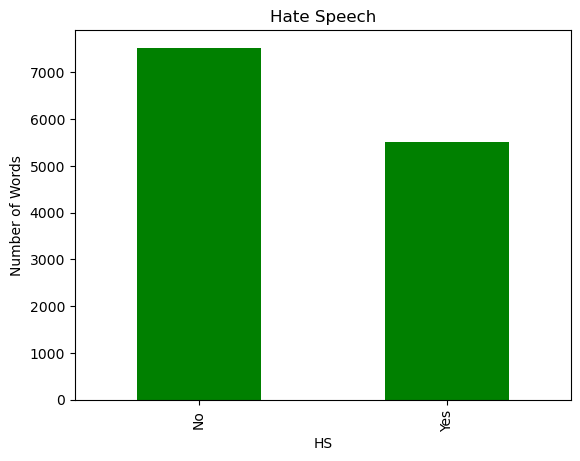

In [23]:
word_count.plot(kind='bar', color='green')
plt.xlabel('HS')
plt.ylabel('Number of Words')
plt.title('Hate Speech')

plt.xticks([0, 1], ['No', 'Yes'])

plt.show()

([<matplotlib.patches.Wedge at 0x14734a890>,
 [Text(-0.17890083456351497, 1.085354546400612, 'Non Abusive'),
  Text(0.1789008345635151, -1.085354546400612, 'Abusive')],
 [Text(-0.09758227339828089, 0.59201157076397, '55.2%'),
  Text(0.09758227339828095, -0.59201157076397, '44.8%')])

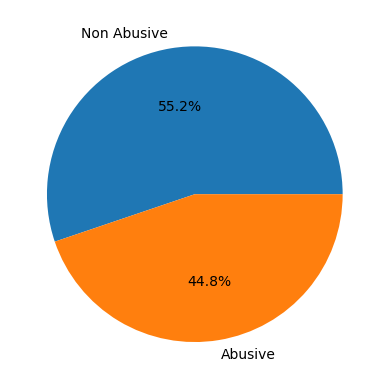

In [24]:
plt.pie(df_abusive['Label'].value_counts(), labels=df_abusive['Label'].value_counts().index, autopct='%1.1f%%')

In [25]:
word_count = df_data.groupby(df_data.Abusive).size()
word_count

Abusive
0    8039
1    5005
dtype: int64

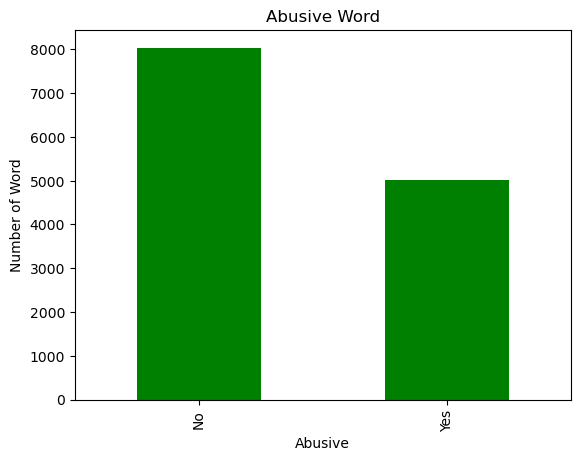

In [26]:
word_count.plot(kind='bar', color='green')
plt.xlabel('Abusive')
plt.ylabel('Number of Word')
plt.title('Abusive Word')

plt.xticks([0, 1], ['No', 'Yes'])

plt.show()

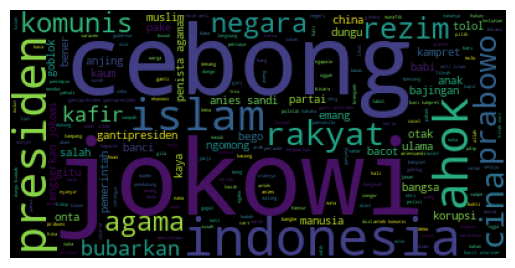

In [27]:
text = ' '.join(df_data['text_remove_stopwords'][df_data.HS==1])
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

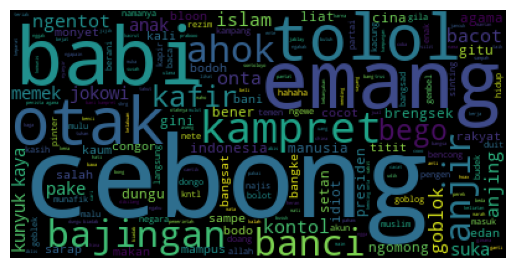

In [28]:
text = ' '.join(df_data['text_remove_stopwords'][df_data.Abusive==1])
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

/Users/feybearsella_m/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/feybearsella_m/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/feybearsella_m/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


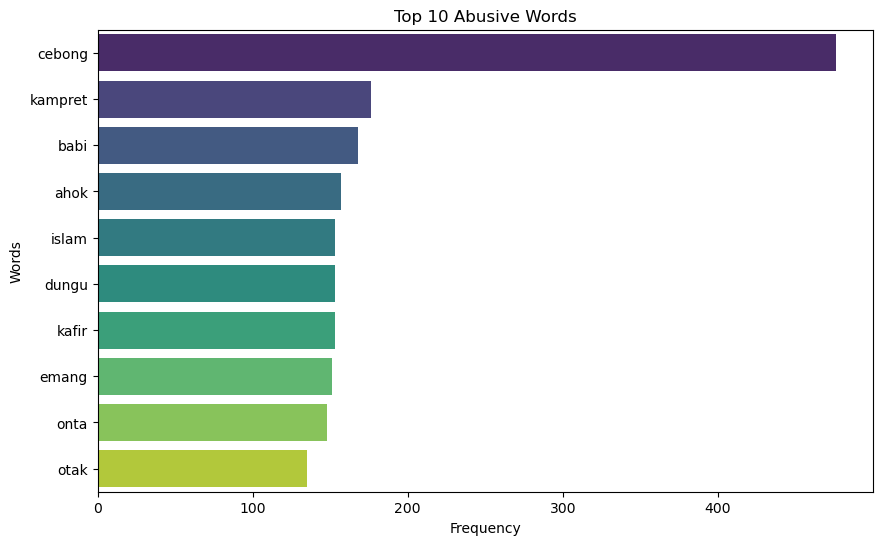

In [29]:
#visualization using seaborn
text_abusive = ' '.join(df_data['text_remove_stopwords'][df_data['Abusive'] == 1])
word_frequencies = pd.Series(text_abusive.split()).value_counts()
top_words = word_frequencies.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_words.values, y=top_words.index, palette='viridis')
plt.title('Top 10 Abusive Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

In [30]:
text_abusive = ' '.join(df_data['text_remove_stopwords'][df_data['Abusive'] == 1])
word_frequencies = pd.Series(text_abusive.split()).value_counts()
top_words = word_frequencies.head(10)
print("\nTop 10 Abusive Words yg sering muncul:")
print("===================")
for word, frequency in top_words.items():
    print(f"{word}: {frequency} kali")


Top 10 Abusive Words yg sering muncul:
cebong: 476 kali
kampret: 176 kali
babi: 168 kali
ahok: 157 kali
islam: 153 kali
dungu: 153 kali
kafir: 153 kali
emang: 151 kali
onta: 148 kali
otak: 135 kali


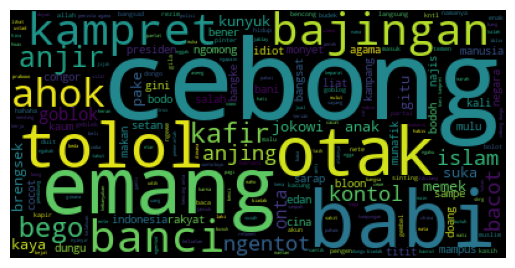

In [31]:
text = ' '.join(df_data['text_remove_stopwords'][df_data.Abusive==1])
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [32]:
text_racist = ' '.join(df_data['text_remove_stopwords'][df_data['HS_Race'] == 1])
word_frequencies = pd.Series(text_racist.split()).value_counts()
top_words = word_frequencies.head(10)
print("\nTop 10 Racist Words yg sering muncul:")
print("===================")
for word, frequency in top_words.items():
    print(f"{word}: {frequency} kali")


Top 10 Racist Words yg sering muncul:
cina: 267 kali
komunis: 162 kali
indonesia: 125 kali
usir: 80 kali
antek: 74 kali
china: 51 kali
ganyang: 44 kali
islam: 42 kali
jokowi: 40 kali
rezim: 36 kali


/Users/feybearsella_m/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/feybearsella_m/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/feybearsella_m/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


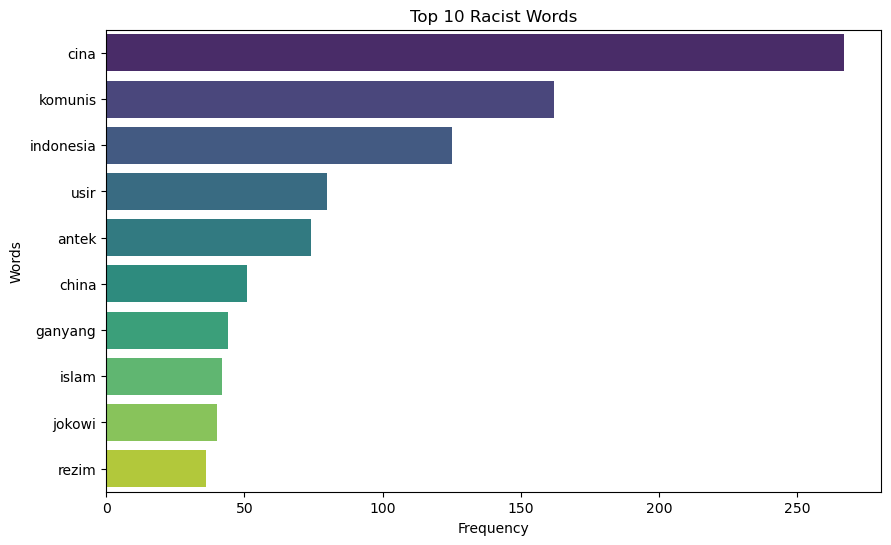

In [33]:
text_racist = ' '.join(df_data['text_remove_stopwords'][df_data['HS_Race'] == 1])
word_frequencies = pd.Series(text_racist.split()).value_counts()
top_words = word_frequencies.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_words.values, y=top_words.index, palette='viridis')
plt.title('Top 10 Racist Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

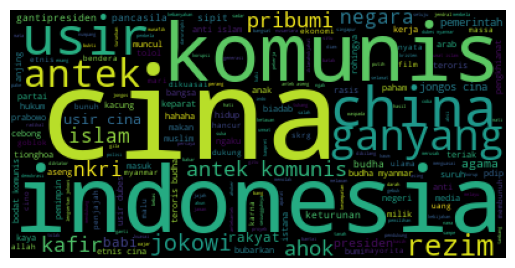

In [34]:
text = ' '.join(df_data['text_remove_stopwords'][df_data.HS_Race==1])
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()